Copyright 2024 Luiz Barboza, Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.

In [1]:
%load_ext rpy2.ipython

# Introduction

Block-based languages offer significant benefits for introducing programming concepts, especially to non-STEM learners. These languages use visual blocks to represent code, making the abstract nature of programming more tangible and accessible. By eliminating syntax errors and reducing the need for memorizing complex commands, they allow learners to focus on the logic and structure of programming. This visual and intuitive approach can lower the barrier to entry, making it easier for beginners to grasp fundamental concepts such as loops, conditionals, and variables. Additionally, block-based programming encourages experimentation and creativity, fostering a more engaging and enjoyable learning experience. As a result, non-STEM users can develop problem-solving skills and computational thinking without the intimidation often associated with traditional text-based coding.


Integrating Google Blockly with Jupyter Notebooks offers a range of advantages that enhance the programming and learning experience. Google Blockly provides a visual, block-based coding environment that simplifies the process of writing code by using draggable blocks to represent programming concepts. When combined with Jupyter Notebooks, this integration allows users to leverage the intuitive design of Blockly within the powerful, interactive framework of Jupyter. This synergy facilitates a smoother transition from visual programming to text-based coding, as learners can easily see the generated code alongside the blocks. It also promotes an interactive and iterative learning process, enabling users to run and test their code in real-time within the notebook environment. Moreover, this combination is particularly beneficial for educators and students, as it supports a variety of teaching methods and learning styles, making complex concepts more accessible and engaging. By lowering the entry barrier and fostering a hands-on approach to coding, Blockly integrated with Jupyter Notebooks empowers users to develop a deeper understanding of programming principles.

The transition from basic statistics to data science can seem overwhelming.
A significant part of the challenge is moving from traditional GUI-oriented programs like SPSS to programming-oriented environments.
This workshop reviews basic statistics in an advanced data science environment, [JupyterLab](https://jupyter.org/), using  blocks-based programming for the [R](https://www.r-project.org/) language. To use this notebook effectively, you should use the [Blockly extension](https://github.com/aolney/jupyterlab-blockly-r-extension) we have developed.
With this extension, you will be able to write *R* code by connecting blocks together.
Blocks-based programming removes some of the burden of learning to program (memorizing syntax, syntax errors, etc) and allows users to focus on solving data science problems. If you are not encountering this notebook in a live workshop, it is recommended that you watch this [short video tutorial](https://youtu.be/ovCJln08mG8?vq=hd720) or this [long video tutorial](https://youtu.be/-luPzplPDI0?vq=hd720) to see a demonstration, especially if you have never used a Jupyter notebook before.

Ready? Let's get started!

# Loading data

<details>
    <summary>Basics: Tabular data</summary>
    
The most common type of structured data is **tabular data** which is what you find in spreadsheets.
If you've ever used a spreadsheet, you know something about tabular data!

Here's an example of tabular data, with *height* in centimeters, *age* in years, and *weight* in kilograms:

| Height | Age | Weight |
|--------|-----|--------|
| 161    | 50  | 53     |
| 161    | 17  | 53     |
| 155    | 33  | 84     |
| 180    | 51  | 84     |
| 186    | 18  | 88     |

In tabular data like this, each **row** is a person.
More generically, we would say each row is an **observation** or **datapoint** (in statistics terminology) or an **item** (in machine learning terminology).
In each row, we have measurements for each of our variables for that particular person.
Since we have five rows of measurements, we know that there are five people in this dataset.

We can also think about tabular data in terms of **columns**.
Each column represents a variable, with the name of that variable in the **column header**.
For example, *height* is at the top of the first column and is the name of the variable for that column.
Importantly, the header is not an observation but rather a description of our data.
This is why we don't count the header when we are counting the rows in our data.

<details>
    <summary>Basics: Delimited tabular data</summary>

You are probably familiar with spreadsheet files, e.g. Microsoft Excel has files that end in `.xls` or `.xlsx`.
However, in data science, it is more common to have tabular data files that are **delimited**.
A delimited file is just a plain text file where column boundaries are represented by a specific character, usually a comma or a tab.

Here's an example of delimited tabular data, with *height* in centimeters, *age* in years, and *weight* in kilograms in **comma separated value (CSV)** form:

```
Height,Age,Weight
161,50,53
161,17,53
155,33,84
180,51,84
186,18,88
```

and here's what the data looks like in **tab separated value (TSV)** form:

```
Height	Age	Weight
161	50	53
161	17	53
155	33	84
180	51	84
186	18	88
```

The choice of the delimiter (comma, tab, or something else) is really arbitrary, but **it's always better to use a delimiter that doesn't appear in your data.**
</details>

First, let's read a CSV file into a dataframe.
A **dataframe** is variable that represents rows, columns, header, etc just like they are stored in a tabular data file.
To do that, we need to import a library called `readr`.
**If it isn't already open**, open up the Blockly extension.

<details>
    <summary>Basics: Open Blockly extension</summary>
    
Open up the Blockly extension by clicking on the painter's palette icon, then clicking on `Blockly R`.

![image.png](https://pbs.twimg.com/media/GQZSxkTXAAI-4t5?format=png&name=360x360)
<details>

## Importing a library

Using the IMPORT menu in the Blockly palette, click on an import block `library some library`:

![image.png](https://pbs.twimg.com/media/GQZTDUtWcAA-5BG?format=png&name=small)

When you click on the block, it drops onto the Blockly workspace.
Click on the `some library` dropdown, choose `Rename variable...`, and type `readr` into the box that pops up.
This imports the *R* `readr` library and gives it the variable name, or alias, `readr`.

In the future, we will abbreviate these steps as:

- `library readr`

Make sure the code cell below is selected (has a blue bar next to it) and press the `Blocks to Code` button below the Blockly workspace.
This will insert the code corresponding to the blocks into the **active cell** in Jupyter, which is the cell that has a blue bar next to it.

Once the code appears in the Jupyter cell below, you must **execute** or **run** it by either pressing the &#9658; button at the top of the window or by pressing Shift + Enter on your keyboard.

In [2]:
%%R
library(readr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="QUyd_^tbT@b#D`z+;z3F">readr</variable></variables><block type="import_R" id="Jm(LPZ?rujGgrkTo`BF|" x="19" y="64"><field name="libraryName" id="QUyd_^tbT@b#D`z+;z3F">readr</field></block></xml>

## Reading a file

We can now do things with `readr`, like load datasets!

Our file is called `heart - train.csv` and it is in the `datasets` folder.
That means the **path** from this notebook (the one you're reading) to the data is `heart - train.csv`.

To read this file into a dataframe, we will use `readr`.
Go to the VARIABLES menu in the Blockly palette and click on the `with readr do ...` block.

![image.png](https://pbs.twimg.com/media/GQZUj0rW4AA2jVT?format=png&name=small)

After it drops into the Blockly workspace, wait until the dropdown stops loading, and then click on it and select `read_csv`.
You can also start typing `read_csv` to narrow the dropdown to matching options.
Then get a `" "` block from TEXT, drop it on the workspace, drag it to the `using` part of the first block, and type the file path `grades.csv` into it.
Your blocks should look like this:

![image.png](https://pbs.twimg.com/media/GQcSl0NWEAAVZfZ?format=png&name=small)

Make sure the cell below is selected, then press `Blocks to Codes`, and execute the cell to run the code by pressing the &#9658; button.

In the future, we will abbreviate these steps as:

- `with readr do read_csv using "heart - train.csv"`

*Note: the first time you use a library, it may take some time to load. You can see that R is working because the status bubble will be filled as shown below. When you load the library in the future, it will load instantly because we cache it.*

<!-- ![image.png](attachment:image.png) -->
![image.png](https://pbs.twimg.com/media/GQZU7vKXcAAG0TP?format=png&name=120x120)

In [3]:
%%R
readr::read_csv("https://raw.githubusercontent.com/memphis-iis/datawhys-r-workshop-2024/main/heart%20-%20train.csv")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="QUyd_^tbT@b#D`z+;z3F">readr</variable></variables><block type="varDoMethod_R" id="BXI@sTI?1fITgAU;Cmp)" x="37" y="74"><mutation items="1"></mutation><field name="VAR" id="QUyd_^tbT@b#D`z+;z3F">readr</field><field name="MEMBER">read_csv</field><data>read_csv</data><value name="ADD0"><block type="text" id="#04H-A8FjJcS}~qI$(Pw"><field name="TEXT">heart - train.csv</field></block></value></block></xml>

Rows: 818 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 818 × 12
     Age Sex   ChestPainType RestingBP Cholesterol FastingBS RestingECG MaxHR
   <dbl> <chr> <chr>             <dbl>       <dbl>     <dbl> <chr>      <dbl>
 1    40 M     ATA                 140         289         0 Normal       172
 2    49 F     NAP                 160         180         0 Normal       156
 3    37 M     ATA                 130         283         0 ST            98
 4    48 F     ASY                 138         214         0 Normal       108
 5    54 M     NAP                 150         195         0 Normal       122
 6    39 M     N

When you run the cell, it will display some information and then the dataframe directly below it.
This is one of the nice things about Jupyter - **it will display the output of the last line of code in a cell**, even if the output is text, a table, or a plot.

## Making a variable

Right now, we haven't actually stored the dataframe anywhere.
We used `readr` to read the csv file, and then Jupyter output that so we could see it.
But if we wanted to do anything with the dataframe, we'd have to read the file again.

Instead of reading the file every time we want to access the data, we can **store it in a variable**.
In other words, we will create a variable and set it to be the dataframe we created from the file.

Using VARIABLES menu in the Blockly palette, click on `Create variable...` and type `dataframe` into the pop up window.
Then click on the `set dataframe to` block so that your blocks below look like this:

![image.png](https://pbs.twimg.com/media/GQZVTthXYAAy9JV?format=png&name=240x240)

Then go get the same blocks you used before to read the file and connect them to the `set dataframe to` block.
You can do this from scratch or you can use the following procedure:

- Click the code cell below and press `Blocks to Code` to save your intermediate work (the `set dataframe to` block)
- Go back to the previous cell, click on the block you want, and copy it using Ctrl+c
- Click on the code cell below to select it, click the Blockly workspace, and paste the block using Ctrl+v

*Tip: If you don't save your intermediate work, you'll lose it because `Notebook Sync` will clear the Blockly workspace when it loads the blocks in the previous cell.*

After you've added the blocks to read the dataframe, drop a variable block for `dataframe` underneath it to display the dataframe.
The result should look like this:

![image.png](https://pbs.twimg.com/media/GQcSwlnWQAAbO_N?format=jpg&name=small)

In the future, we will abbreviate these steps as:

- Create `dataframe` and set it to `with readr do read_csv using "heart - train.csv.csv"`
- `dataframe`

As always, you need to hit the &#9658; button or press Shift + Enter to run the code.

In [4]:
%%R
dataframe = readr::read_csv("https://raw.githubusercontent.com/memphis-iis/datawhys-r-workshop-2024/main/heart%20-%20train.csv")
print(dataframe);

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="r7L^8L7q_tPXFua/tb}V">dataframe</variable><variable id="QUyd_^tbT@b#D`z+;z3F">readr</variable></variables><block type="variables_set" id="eft2DaS|tE;JU/:eW@UI" x="30" y="52"><field name="VAR" id="r7L^8L7q_tPXFua/tb}V">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id="5w9_0:Mp@i@aOnW~@%D3"><mutation items="1"></mutation><field name="VAR" id="QUyd_^tbT@b#D`z+;z3F">readr</field><field name="MEMBER">read_csv</field><data>read_csv</data><value name="ADD0"><block type="text" id="`:hG/v10!]v|8$a/95;-"><field name="TEXT">heart - train.csv</field></block></value></block></value><next><block type="text_print" id="a,K3H@bMrzPbI24ihU7J"><value name="TEXT"><shadow type="text" id="R]e|#w2;f#]sBJj=?=7{"><field name="TEXT">abc</field></shadow><block type="variables_get" id=",{GHn;ap/drC0G2o{IrJ"><field name="VAR" id="r7L^8L7q_tPXFua/tb}V">dataframe</field></block></value></block></next></block></xml>

Rows: 818 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 818 × 12
     Age Sex   ChestPainType RestingBP Cholesterol FastingBS RestingECG MaxHR
   <dbl> <chr> <chr>             <dbl>       <dbl>     <dbl> <chr>      <dbl>
 1    40 M     ATA                 140         289         0 Normal       172
 2    49 F     NAP                 160         180         0 Normal       156
 3    37 M     ATA                 130         283         0 ST            98
 4    48 F     ASY                 138         214         0 Normal       108
 5    54 M     NAP                 150         195         0 Normal       122
 6    39 M     N

You should see the same output as before - the only difference is that we've read the csv and stored the data into the `dataframe` block, so we will use the `dataframe` block whenever we want to work with the data.

## Recap: Loading data

When you want to load data in the future, simply do the following:

- library `readr` *(loads the library)*
- Set `dataframe` to with `readr` do `read_csv` using `your data file name` *(loads the dataframe)*
- `dataframe` *(displays the dataframe)*

# Data Manipulation

**About Dataset**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Attribute Information**
- ***Age***: age of the patient [years]
- ***Sex***: sex of the patient [M: Male, F: Female]
- ***ChestPainType***: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- ***RestingBP***: resting blood pressure [mm Hg]
- ***Cholesterol***: serum cholesterol [mm/dl]
- ***FastingBS***: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- ***RestingECG***: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- ***MaxHR***: maximum heart rate achieved [Numeric value between 60 and 202]
- ***ExerciseAngina***: exercise-induced angina [Y: Yes, N: No]
- ***Oldpeak***: oldpeak = ST [Numeric value measured in depression]
- ***ST_Slope***: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- ***HeartDisease***: output class [1: heart disease, 0: Normal]

**Origin**
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:
- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

Total: 1190 observations

Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/


**Acknowledgements**:
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
- Donor:
David W. Aha (aha '@' ics.uci.edu)

**Source**

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## Filter Rows

There are many things we can do with dataframes.
One thing we can do is get specific rows, which are our datapoints.
We can manipulate dataframes easily using another library called `dplyr`, so let's load it first:

- `library dplyr`

*Then &#9658; or Shift + Enter*

In [5]:
%%R
library(dplyr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="=.SY8[Se#Q2`?mVx5k)0">dplyr</variable></variables><block type="import_R" id="hVU+_;`ym3.d-w3i1q0%" x="86" y="26"><field name="libraryName" id="=.SY8[Se#Q2`?mVx5k)0">dplyr</field></block></xml>

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




Don't worry too much about the messages displayed pink at this point.

Let's get the first row of the dataframe.
We can do that using the `slice` function:

- with `dplyr` do `filter` using `dataframe` and freestyle `Age>70`

To get an extra slot for `Age>70`, use the `+` button on the block.

Your blocks should look like this:

![image.png](https://pbs.twimg.com/media/GQcUeGmXQAAVFmV?format=png&name=small)

*Make sure the code cell below is selected, then &#9658; or Shift + Enter*

In [6]:
%%R
dplyr::filter(dataframe,Age>70)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="=.SY8[Se#Q2`?mVx5k)0">dplyr</variable><variable id="r7L^8L7q_tPXFua/tb}V">dataframe</variable></variables><block type="varDoMethod_R" id="=8;[HbpcOR8C2k.kqQmL" x="122" y="127"><mutation items="2"></mutation><field name="VAR" id="=.SY8[Se#Q2`?mVx5k)0">dplyr</field><field name="MEMBER">filter</field><data>filter</data><value name="ADD0"><block type="variables_get" id="@ol-T`[vXy@mMGL#h_x+"><field name="VAR" id="r7L^8L7q_tPXFua/tb}V">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="h].OpUrR)=@9a+uKGL|t"><field name="CODE">Age&gt;70</field></block></value></block></xml>

# A tibble: 23 × 12
     Age Sex   ChestPainType RestingBP Cholesterol FastingBS RestingECG MaxHR
   <dbl> <chr> <chr>             <dbl>       <dbl>     <dbl> <chr>      <dbl>
 1    74 M     ATA                 145           0         1 ST           123
 2    72 M     NAP                 160           0         0 LVH          114
 3    73 F     NAP                 160           0         0 ST           121
 4    74 M     NAP                 138           0         0 Normal       116
 5    77 M     ASY                 124         171         0 ST           110
 6    72 M     NAP                 120         214         0 Normal       102
 7    75 M     ASY                 170         203         1 ST           108
 8    75 M     ASY                 136         225         0 Normal       112
 9    72 M     ASY                 143         211         0 Normal       109
10    74 M     ASY                 150         258         1 ST           130
# ℹ 13 more rows
# ℹ 4 more variables: Exerc

As you can see, the output is only the grades above 7 (seven)


## Selecting columns

Similarly, we can get a column of the dataframe by using the name of that column in a freestyle block.
The name must **exactly** match the spelling and case of the column:

- with `dplyr` do `select` using `dataframe` and `Student`

![](https://pbs.twimg.com/media/GQcUQxKWQAA6lBD?format=png&name=small)

And run it.

In [7]:
%%R
dplyr::select(dataframe,HeartDisease)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="=.SY8[Se#Q2`?mVx5k)0">dplyr</variable><variable id="r7L^8L7q_tPXFua/tb}V">dataframe</variable></variables><block type="varDoMethod_R" id="{xK_QmFeb|a@i$M$1P^5" x="83" y="151"><mutation items="2"></mutation><field name="VAR" id="=.SY8[Se#Q2`?mVx5k)0">dplyr</field><field name="MEMBER">select</field><data>select</data><value name="ADD0"><block type="variables_get" id="[[-NQ+ANPQ)sV8,829}3"><field name="VAR" id="r7L^8L7q_tPXFua/tb}V">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="X?$VFDGzo^/HAjiTwa2S"><field name="CODE">HeartDisease</field></block></value></block></xml>

# A tibble: 818 × 1
   HeartDisease
          <dbl>
 1            0
 2            1
 3            0
 4            1
 5            0
 6            0
 7            0
 8            0
 9            1
10            0
# ℹ 808 more rows
# ℹ Use `print(n = ...)` to see more rows


Putting together the **row filtering** and the **column selection**, as follow:

![](https://pbs.twimg.com/media/GQZfP2SWEAAY_Vw?format=png&name=small)

In [8]:
%%R
dplyr::select(dplyr::filter(dataframe,Age>70),HeartDisease)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="=.SY8[Se#Q2`?mVx5k)0">dplyr</variable><variable id="r7L^8L7q_tPXFua/tb}V">dataframe</variable></variables><block type="varDoMethod_R" id="kMALR$*{p=A7uV^.uYHq" x="49" y="44"><mutation items="2"></mutation><field name="VAR" id="=.SY8[Se#Q2`?mVx5k)0">dplyr</field><field name="MEMBER">select</field><data>select</data><value name="ADD0"><block type="varDoMethod_R" id="-?`]t=?*Xp$NMmt/g!2F"><mutation items="2"></mutation><field name="VAR" id="=.SY8[Se#Q2`?mVx5k)0">dplyr</field><field name="MEMBER">filter</field><data>filter</data><value name="ADD0"><block type="variables_get" id="Z%n*l`7muYE3qC_x8*CC"><field name="VAR" id="r7L^8L7q_tPXFua/tb}V">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="H0UE]?4=]u`bd`;Su?:O"><field name="CODE">Age&gt;70</field></block></value></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="w,2@P+#:;;:d;x,K|r{r"><field name="CODE">HeartDisease</field></block></value></block></xml>

# A tibble: 23 × 1
   HeartDisease
          <dbl>
 1            1
 2            0
 3            1
 4            0
 5            1
 6            1
 7            1
 8            1
 9            1
10            1
# ℹ 13 more rows
# ℹ Use `print(n = ...)` to see more rows


##  Pipe Operator (%>%)

The R pipe operator (`%>%`), from the `magrittr` and `dplyr` packages, allows for more readable and concise code by passing the output of one function directly into the next. This enables a clear, left-to-right flow of data transformations, making sequences of operations easier to understand and maintain. Instead of nested functions like `f(g(h(x)))`, you can write `x %>% h() %>% g() %>% f()`, simplifying both code readability and debugging.

Let's re-connect the **filter** with the **select** using `%>%` (pipes)  

![](https://pbs.twimg.com/media/GQcVu2cXUAAImEQ?format=png&name=900x900)

In [9]:
%%R
dataframe %>%
    dplyr::filter(Age>70) %>%
    dplyr::select(HeartDisease)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="r7L^8L7q_tPXFua/tb}V">dataframe</variable><variable id="=.SY8[Se#Q2`?mVx5k)0">dplyr</variable></variables><block type="pipe_R" id="h8=|y0vuQ?$F+j},Fmu7" x="125" y="303"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="Z%n*l`7muYE3qC_x8*CC"><field name="VAR" id="r7L^8L7q_tPXFua/tb}V">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="-?`]t=?*Xp$NMmt/g!2F"><mutation items="1"></mutation><field name="VAR" id="=.SY8[Se#Q2`?mVx5k)0">dplyr</field><field name="MEMBER">filter</field><data>filter</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="H0UE]?4=]u`bd`;Su?:O"><field name="CODE">Age&gt;70</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="kMALR$*{p=A7uV^.uYHq"><mutation items="1"></mutation><field name="VAR" id="=.SY8[Se#Q2`?mVx5k)0">dplyr</field><field name="MEMBER">select</field><data>select</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="w,2@P+#:;;:d;x,K|r{r"><field name="CODE">HeartDisease</field></block></value></block></value></block></xml>

# A tibble: 23 × 1
   HeartDisease
          <dbl>
 1            1
 2            0
 3            1
 4            0
 5            1
 6            1
 7            1
 8            1
 9            1
10            1
# ℹ 13 more rows
# ℹ Use `print(n = ...)` to see more rows


## Data Consolidation / Summarization

Using the `group_by` operator is essential in data analysis for organizing data by a categorical column and summarizing it with a numerical one. By grouping data this way, analysts can apply mathematical functions like means, medians, or sums to each group, uncovering patterns and trends within the dataset. This approach helps to highlight key differences and similarities across segments, making the results clearer and more interpretable, thus facilitating better decision-making.

![](https://pbs.twimg.com/media/GQcY-zpXEAEk_LV?format=jpg&name=small)


In [10]:
%%R
avgHR = dataframe %>%
    dplyr::group_by(HeartDisease) %>%
    dplyr::summarise(avg = mean(MaxHR))
avgHR
#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="ocR_fh#Y),ii!ZBEj{k9">avgHR</variable><variable id="r7L^8L7q_tPXFua/tb}V">dataframe</variable><variable id="=.SY8[Se#Q2`?mVx5k)0">dplyr</variable></variables><block type="variables_set" id="$66:;@/6)#_5~,N3[m*(" x="28" y="46"><field name="VAR" id="ocR_fh#Y),ii!ZBEj{k9">avgHR</field><value name="VALUE"><block type="pipe_R" id="h8=|y0vuQ?$F+j},Fmu7"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="Z%n*l`7muYE3qC_x8*CC"><field name="VAR" id="r7L^8L7q_tPXFua/tb}V">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="-?`]t=?*Xp$NMmt/g!2F"><mutation items="1"></mutation><field name="VAR" id="=.SY8[Se#Q2`?mVx5k)0">dplyr</field><field name="MEMBER">group_by</field><data>group_by</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="H0UE]?4=]u`bd`;Su?:O"><field name="CODE">HeartDisease</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="kMALR$*{p=A7uV^.uYHq"><mutation items="1"></mutation><field name="VAR" id="=.SY8[Se#Q2`?mVx5k)0">dplyr</field><field name="MEMBER">summarise</field><data>summarise</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="w,2@P+#:;;:d;x,K|r{r"><field name="CODE">avg = mean(MaxHR)</field></block></value></block></value></block></value></block></xml>

# A tibble: 2 × 2
  HeartDisease   avg
         <dbl> <dbl>
1            0  146.
2            1  126.


## Recap: Data Manipulation

Dataframes are both lists of rows and lists of columns.
Whether we treat a dataframe as a list of rows or list of columns depends on what we want to do.
If we want to select datapoints (observations), then we treat it as a list of rows, because each row is a datapoint.
In our dataset above, this would be like selecting the people in the dataset we want to analyze, since each row is a person.
In contrast, if we want to select variables, then we treat the dataframe like a list of columns.

# Plotting

Data visualization is the discipline of trying to understand data by using graphic context so patterns, trends, and correlations that might not otherwise be detected can be exposed.

Data visualization is an important tool to understand data.

Charts, plots, graphs, and maps (and many more) are all types of data visualizations.

There are many facets involved in data visualization; this tutorial is just the introduction in your R plotting journey.

Today we will focus on the most often used plots:

- Bar plots
- Line plots
- Pie charts

*Each type of plot requires a specific type of data and has a specific purpose.*

In R, there are many options for visualizing data and is often challenging to choose which library to use.

For the purpose of this tutorial, we will focus on understanding, programming, and interpreting plots from `ggplot2`.

To use `ggplot2`,

- `library ggplot2`

In [11]:
%%R
library(ggplot2)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</variable></variables><block type="import_R" id="3t`K9;mO8ny4q3$o=9wR" x="100" y="78"><field name="libraryName" id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</field></block></xml>

The `ggplot2` package in R is a powerful tool for creating a wide range of static, interactive, and animated graphics. Its basic usage involves initializing a plot with the `ggplot()` function, specifying the dataset and aesthetic mappings (using `aes()`) to define how data variables are mapped to visual properties like the x and y axes. Layers are then added to the plot using `geom_` functions (e.g., `geom_point()` for scatter plots, `geom_bar()` for bar charts), which specify the type of plot. Additional customization can be applied through themes and scales to adjust colors, labels, and other stylistic elements. This structured approach to building plots makes `ggplot2` highly flexible and powerful for data visualization.

## Bar plots

Bar plots are very commonly used in both science and the business world.

Bar plots:

- Require the x to be discrete values
- Require the y to be a single number per x
- Are best for showing summary values like averages

In other words, while scatterplots show all the datapoints, bar plots only show a **summary value of y** for each x.

Let's make a bar plot using the average, or `mean` of the variables as a summary value.

![](https://pbs.twimg.com/media/GQcZb7lW0AAsh_y?format=jpg&name=small)

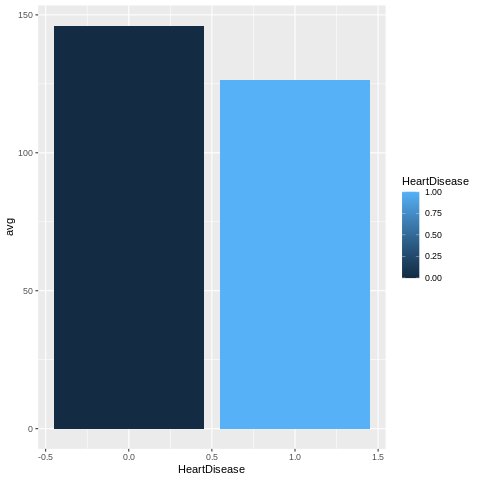

In [12]:
%%R
ggplot2::ggplot(avgHR,aes(x=HeartDisease,y=avg,fill=HeartDisease)) +
    geom_bar(stat='identity')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</variable><variable id="ocR_fh#Y),ii!ZBEj{k9">avgHR</variable></variables><block type="ggplot_plus_R" id="rTY_6060JSLR.oh+FmXX" x="66" y="182"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="?*5V[OnqN-*z6.XLkQc]"><mutation items="2"></mutation><field name="VAR" id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot</data><value name="ADD0"><block type="variables_get" id="4+M@WovcR7:K/d|p[,an"><field name="VAR" id="ocR_fh#Y),ii!ZBEj{k9">avgHR</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="d(weu*1+[KV+T/L3FrMx"><field name="CODE">aes(x=HeartDisease,y=avg,fill=HeartDisease)</field></block></value></block></value><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="gk4y5=tY^(@lZ/Xttb{/"><field name="CODE">geom_bar(stat='identity')</field></block></value></block></xml>

The **stat** parameter `identity` is applicable here because we had the data already summarized. In case we need to **ggplot** to summarize the data at the same time the plot is generated it is possible to do so with **stat** parameter as `summary` and the parameter **fun** (function)

![](https://pbs.twimg.com/media/GQcZ187XEAAo8h3?format=jpg&name=small)

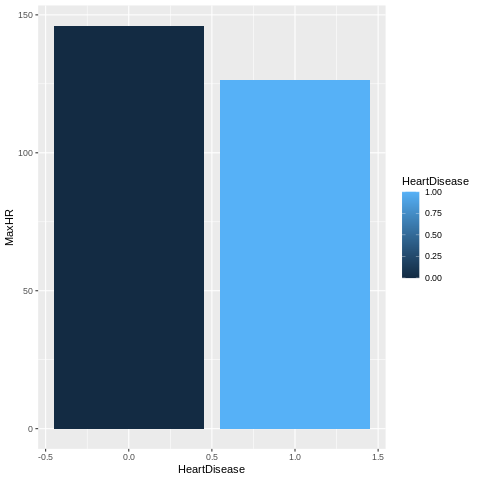

In [13]:
%%R
ggplot2::ggplot(dataframe,aes(x=HeartDisease,y=MaxHR,fill=HeartDisease)) +
    geom_bar(stat="summary",fun="mean")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</variable><variable id="r7L^8L7q_tPXFua/tb}V">dataframe</variable></variables><block type="ggplot_plus_R" id="rTY_6060JSLR.oh+FmXX" x="15" y="76"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="?*5V[OnqN-*z6.XLkQc]"><mutation items="2"></mutation><field name="VAR" id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot</data><value name="ADD0"><block type="variables_get" id="4+M@WovcR7:K/d|p[,an"><field name="VAR" id="r7L^8L7q_tPXFua/tb}V">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="d(weu*1+[KV+T/L3FrMx"><field name="CODE">aes(x=HeartDisease,y=MaxHR,fill=HeartDisease)</field></block></value></block></value><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="gk4y5=tY^(@lZ/Xttb{/"><field name="CODE">geom_bar(stat="summary",fun="mean")</field></block></value></block></xml>

## Pie Chart

A pie chart is a circular graph that visually represents proportions or percentages of a whole. It is divided into slices to illustrate the distribution of categories within the dataset. Each slice corresponds to a category or group, and its size is proportional to the quantity it represents relative to the whole. Pie charts are effective for conveying simple comparisons at a glance but can become less effective with too many categories or when trying to compare slices that are similar in size. They are commonly used in presentations and reports to highlight relative proportions, such as market shares, survey responses, or budget allocations.

Let's start summarizing the data:

![](https://pbs.twimg.com/media/GQcbFF5WkAEjTVC?format=jpg&name=small)

In [14]:
%%R
count_gender_with_disease = dataframe %>%
    dplyr::filter(HeartDisease>0) %>%
    dplyr::group_by(Sex) %>%
    dplyr::summarise(qty = NROW(Sex))
print(count_gender_with_disease);

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="oup7i5t?*TI}@LPRoQrH">count_gender_with_disease</variable><variable id="r7L^8L7q_tPXFua/tb}V">dataframe</variable><variable id="=.SY8[Se#Q2`?mVx5k)0">dplyr</variable></variables><block type="variables_set" id="%.=0.FE?=+qI{Pvu9xpB" x="21" y="238"><field name="VAR" id="oup7i5t?*TI}@LPRoQrH">count_gender_with_disease</field><value name="VALUE"><block type="pipe_R" id="h8=|y0vuQ?$F+j},Fmu7"><mutation items="3"></mutation><value name="INPUT"><block type="variables_get" id="Z%n*l`7muYE3qC_x8*CC"><field name="VAR" id="r7L^8L7q_tPXFua/tb}V">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="Lyu)YVK3Js(#Q-/+vBOK"><mutation items="1"></mutation><field name="VAR" id="=.SY8[Se#Q2`?mVx5k)0">dplyr</field><field name="MEMBER">filter</field><data>filter</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="3:p+[1,MM!=mp90^w--Z"><field name="CODE">HeartDisease&gt;0</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="-?`]t=?*Xp$NMmt/g!2F"><mutation items="1"></mutation><field name="VAR" id="=.SY8[Se#Q2`?mVx5k)0">dplyr</field><field name="MEMBER">group_by</field><data>group_by</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="H0UE]?4=]u`bd`;Su?:O"><field name="CODE">Sex</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="kMALR$*{p=A7uV^.uYHq"><mutation items="1"></mutation><field name="VAR" id="=.SY8[Se#Q2`?mVx5k)0">dplyr</field><field name="MEMBER">summarise</field><data>summarise</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="w,2@P+#:;;:d;x,K|r{r"><field name="CODE">qty = NROW(Sex)</field></block></value></block></value></block></value><next><block type="text_print" id="JV6:.sTZO-|K~M`dB#wk"><value name="TEXT"><shadow type="text" id="w$;^C~kF7Fd[pyDucC#["><field name="TEXT">abc</field></shadow><block type="variables_get" id="VKPhT$O+w@yj=8?TFAoe"><field name="VAR" id="oup7i5t?*TI}@LPRoQrH">count_gender_with_disease</field></block></value></block></next></block></xml>

# A tibble: 2 × 2
  Sex     qty
  <chr> <int>
1 F        40
2 M       420


`ggplot2` does not have a built-in pie chart function, so to create a pie chart-like visualization, a bar plot can be adapted using `coord_polar()` to transform it into a circular layout and `geom_text()` for labeling proportions as percentages of the total.

![](https://pbs.twimg.com/media/GQcbaVeWwAA-Rm9?format=jpg&name=small)

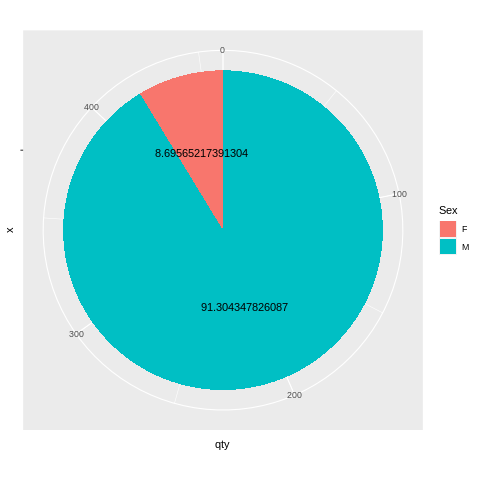

In [15]:
%%R
ggplot2::ggplot(count_gender_with_disease,aes(x="",y=qty,fill=Sex)) +
    geom_bar(stat='identity') +
    coord_polar("y") +
    geom_text(aes(label = qty/sum(qty)*100),position=position_stack(vjust = 0.5) )

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</variable><variable id="oup7i5t?*TI}@LPRoQrH">count_gender_with_disease</variable></variables><block type="ggplot_plus_R" id="rTY_6060JSLR.oh+FmXX" x="66" y="182"><mutation items="3"></mutation><value name="INPUT"><block type="varDoMethod_R" id="?*5V[OnqN-*z6.XLkQc]"><mutation items="2"></mutation><field name="VAR" id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot</data><value name="ADD0"><block type="variables_get" id="4+M@WovcR7:K/d|p[,an"><field name="VAR" id="oup7i5t?*TI}@LPRoQrH">count_gender_with_disease</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="d(weu*1+[KV+T/L3FrMx"><field name="CODE">aes(x="",y=qty,fill=Sex)</field></block></value></block></value><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="gk4y5=tY^(@lZ/Xttb{/"><field name="CODE">geom_bar(stat='identity')</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="[~Nv4CxYX5Vr`i/H4WZq"><field name="CODE">coord_polar("y")</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="oYXC+k-l@T#I|]PME*{F"><field name="CODE"> geom_text(aes(label = qty/sum(qty)*100),position=position_stack(vjust = 0.5) )</field></block></value></block></xml>

## Line plots

Line plots are virtually identical to bar plots in usage because they:

- Require the x to be discrete values
- Require the y to be a single number per x
- Are best for showing summary values like averages

However, line plots, unlike bar plots, have the advantage that you can show multiple **sets** of lines at once.
In a bar plot, these would be overlapping, and patterns would be potentially difficult to see.

Making a line plot is very similar to a bar plot.

Let's load another dataframe (df), `utilities.csv`

In [16]:
%%R
covid = readr::read_csv("https://raw.githubusercontent.com/memphis-iis/datawhys-r-workshop-2024/main/covid.csv")
print(covid);

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+,WfrKu=AEz:tuJsz$3R">covid</variable><variable id="QUyd_^tbT@b#D`z+;z3F">readr</variable></variables><block type="variables_set" id="+3RjgTKf(GJKydyH!]3$" x="61" y="57"><field name="VAR" id="+,WfrKu=AEz:tuJsz$3R">covid</field><value name="VALUE"><block type="varDoMethod_R" id="cpeNhl)flM6{k#UBj|)5"><mutation items="1"></mutation><field name="VAR" id="QUyd_^tbT@b#D`z+;z3F">readr</field><field name="MEMBER">read_csv</field><data>read_csv</data><value name="ADD0"><block type="text" id="gDzKemEA_(WbT/rQ-.6M"><field name="TEXT">covid.csv</field></block></value></block></value><next><block type="text_print" id="LVs{:fcUN=HYKrJTPU#k"><value name="TEXT"><shadow type="text" id="G+Xj0(wXmpwL%)U]L6ks"><field name="TEXT">abc</field></shadow><block type="variables_get" id="Fh@kvv0tJ@px~6IF$%~c"><field name="VAR" id="+,WfrKu=AEz:tuJsz$3R">covid</field></block></value></block></next></block></xml>

Rows: 1758 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): variable
dbl  (1): values
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 1,758 × 3
   date       variable values
   <date>     <chr>     <dbl>
 1 2020-01-23 Brazil        0
 2 2020-01-24 Brazil        0
 3 2020-01-25 Brazil        0
 4 2020-01-26 Brazil        0
 5 2020-01-27 Brazil        0
 6 2020-01-28 Brazil        0
 7 2020-01-29 Brazil        0
 8 2020-01-30 Brazil        0
 9 2020-01-31 Brazil        0
10 2020-02-01 Brazil        0
# ℹ 1,748 more rows
# ℹ Use `print(n = ...)` to see more rows


Here `ggplot2` nicely draws each variable in its own color, so we can see that all variables except `SepalWidth` seem to increase across species.

There are two important points to make here:

- Normally in line plots, the x axis is an ordered variable, like year. With a nominal variable like `Species`, we are fortunate to get such nice lines and not "spaghetti."

- Drawing multiple lines at once on one plot only makes sense if the variables have the same units of measurement, here centimeters. Otherwise the plot can mislead anyone not looking closely at the y axis.

See the below the covid cases line plot for US, Brazil and India:

![](https://pbs.twimg.com/media/GQcfEKiW8AAphyK?format=jpg&name=small)

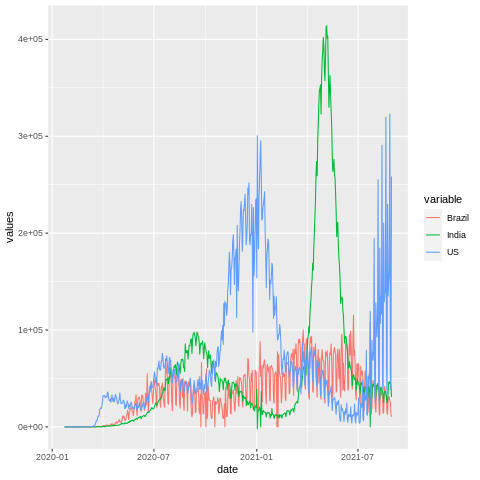

In [17]:
%%R
ggplot2::ggplot(covid,aes(x=date,y=values,group= variable,color= variable)) +
    geom_line()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</variable><variable id="+,WfrKu=AEz:tuJsz$3R">covid</variable></variables><block type="ggplot_plus_R" id="rTY_6060JSLR.oh+FmXX" x="28" y="124"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="?*5V[OnqN-*z6.XLkQc]"><mutation items="2"></mutation><field name="VAR" id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot</data><value name="ADD0"><block type="variables_get" id="4+M@WovcR7:K/d|p[,an"><field name="VAR" id="+,WfrKu=AEz:tuJsz$3R">covid</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="d(weu*1+[KV+T/L3FrMx"><field name="CODE">aes(x=date,y=values,group= variable,color= variable)</field></block></value></block></value><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="gk4y5=tY^(@lZ/Xttb{/"><field name="CODE">geom_line()</field></block></value></block></xml>

## Recap: Plotting

There are many types of plots, and which you should choose depends on the variables you want to visualize as well as the purpose of your visualization:


- Bar plots show a single value for each x, typically an average or other summary value
- Line plots are like bar plots but have an advantage for showing multiple lines at once


An important type of plot, the boxplot, was not discussed here because it requires a foundation in descriptive statistics, which we will cover next.

# Statistical Graphs

Two of the essential statistical graphs used to visualize distributions and summarize data characteristics, histograms and boxplots. Histograms visualize the distribution of numerical data by grouping values into bins and showing the frequency of values in each bin. They reveal patterns in data such as skewness and central tendency. Boxplots summarize the distribution of numerical data using quartiles, displaying the median, interquartile range, and outliers. They provide insights into the spread and skewness of data, making them essential for understanding data variability and identifying outliers in a compact visual format.

## Histograms

Histograms introduce a new idea, **probability distributions**, into the discussion.
A probability distribution is simply a table listing the probability that a variable will have a particular value.

In our work, you can think in terms of **count distributions** or the number of times a variable has a particular value.
We will use the term **distribution** to refer to either count or probability distributions interchangeably.

There are as many different types of distributions - as many as different types of animals in the zoo!
For our purposes, we highlight five general shapes of distributions:

- **Uniform:** a flat distribution where every value is equally likely
- **Normal:** a bell curve distribution where values toward the middle are most likely
- **Skewed right:** a declining distribution were small values are likely and large values unlikely
- **Skewed left:** the opposite of skewed right
- **Mixtures:** appear as two or more of the above distributions

The purpose of generating histograms is to visually determine the approximate distribution of a variable.
Histograms can reveal extreme values, missing ranges, or skew, that may require special care in later analysis.

Histograms:

- Require x
- Automatically determine bar widths for x
- Automatically define y as the count of values for x
- Are used to show the distribution of a **single** variable

Let's look at a numeric example.

![](https://pbs.twimg.com/media/GQcgMq9WgAEltwX?format=jpg&name=small)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


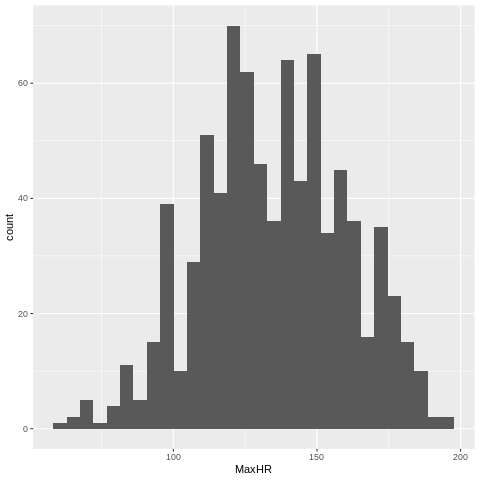

In [18]:
%%R
ggplot2::ggplot(dataframe,aes(x=MaxHR)) +
    geom_histogram()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</variable><variable id="r7L^8L7q_tPXFua/tb}V">dataframe</variable></variables><block type="ggplot_plus_R" id="rTY_6060JSLR.oh+FmXX" x="66" y="182"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="?*5V[OnqN-*z6.XLkQc]"><mutation items="2"></mutation><field name="VAR" id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot</data><value name="ADD0"><block type="variables_get" id="4+M@WovcR7:K/d|p[,an"><field name="VAR" id="r7L^8L7q_tPXFua/tb}V">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="d(weu*1+[KV+T/L3FrMx"><field name="CODE">aes(x=MaxHR)</field></block></value></block></value><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="gk4y5=tY^(@lZ/Xttb{/"><field name="CODE">geom_histogram()</field></block></value></block></xml>

# Boxplot

A boxplot, also known as a box-and-whisker plot, is a statistical visualization tool that provides a concise summary of the distribution of numerical data. The plot consists of a box that represents the interquartile range (IQR), spanning from the first quartile (Q1) to the third quartile (Q3). Inside the box, a line denotes the median (Q2) of the data. The whiskers extend from the box to the minimum and maximum values within a predefined range, typically 1.5 times the IQR. Outliers beyond this range are often plotted individually. Boxplots are valuable for identifying the spread, skewness, and potential outliers in datasets, offering insights into the variability and central tendency of the data in a clear and intuitive manner. They are widely used in exploratory data analysis and comparative studies across different groups or variables.

Let's try an example:

![](https://pbs.twimg.com/media/GQchEmwWUAAb0sq?format=jpg&name=small)

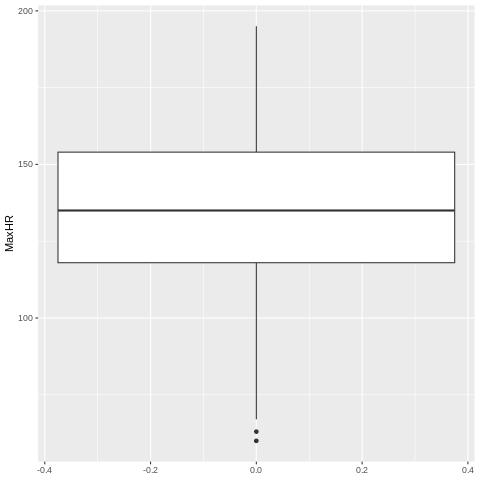

In [19]:
%%R
ggplot2::ggplot(dataframe,aes(y=MaxHR)) +
    geom_boxplot()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</variable><variable id="r7L^8L7q_tPXFua/tb}V">dataframe</variable></variables><block type="ggplot_plus_R" id="rTY_6060JSLR.oh+FmXX" x="66" y="182"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="?*5V[OnqN-*z6.XLkQc]"><mutation items="2"></mutation><field name="VAR" id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot</data><value name="ADD0"><block type="variables_get" id="4+M@WovcR7:K/d|p[,an"><field name="VAR" id="r7L^8L7q_tPXFua/tb}V">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="d(weu*1+[KV+T/L3FrMx"><field name="CODE">aes(y=MaxHR)</field></block></value></block></value><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="gk4y5=tY^(@lZ/Xttb{/"><field name="CODE">geom_boxplot()</field></block></value></block></xml>

If want to breakdown your analysis having multiple boxplot by a categorical column:

![](https://pbs.twimg.com/media/GQchYxEXkAAK6Ok?format=jpg&name=small)

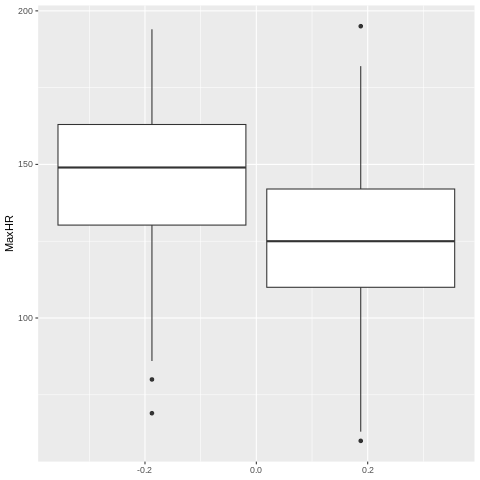

In [20]:
%%R
ggplot2::ggplot(dataframe,aes(y=MaxHR,group=HeartDisease)) +
    geom_boxplot()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</variable><variable id="r7L^8L7q_tPXFua/tb}V">dataframe</variable></variables><block type="ggplot_plus_R" id="rTY_6060JSLR.oh+FmXX" x="66" y="182"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="?*5V[OnqN-*z6.XLkQc]"><mutation items="2"></mutation><field name="VAR" id="7+w:`q{t{eZ_#W;5ltqQ">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot</data><value name="ADD0"><block type="variables_get" id="4+M@WovcR7:K/d|p[,an"><field name="VAR" id="r7L^8L7q_tPXFua/tb}V">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="d(weu*1+[KV+T/L3FrMx"><field name="CODE">aes(y=MaxHR,group=HeartDisease)</field></block></value></block></value><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="gk4y5=tY^(@lZ/Xttb{/"><field name="CODE">geom_boxplot()</field></block></value></block></xml>

In [21]:
%R install.packages("devtools")

(as ‘lib’ is unspecified)










































































	‘/tmp/RtmpD10W3t/downloaded_packages’



In [22]:
%R library(devtools)

'devtools','usethis','ggplot2',...,'datasets','methods','base'


In [23]:
%R devtools::install_github("lbarbozaum/sbp")

These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

 1: All                                 
 2: CRAN packages only                  
 3: None                                
 4: rlang      (1.1.3  -> 1.1.4 ) [CRAN]
 5: xfun       (0.41   -> 0.45  ) [CRAN]
 6: openssl    (2.0.6  -> 2.2.0 ) [CRAN]
 7: curl       (5.0.2  -> 5.2.1 ) [CRAN]
 8: highr      (0.9    -> 0.11  ) [CRAN]
 9: evaluate   (0.23   -> 0.24.0) [CRAN]
10: data.table (1.15.0 -> 1.15.4) [CRAN]
11: rstudioapi (0.15.0 -> 0.16.0) [CRAN]
12: knitr      (1.45   -> 1.47  ) [CRAN]

Enter one or more numbers, or an empty line to skip updates: 



(as ‘lib’ is unspecified)


















































































	‘/tmp/RtmpD10W3t/downloaded_packages’



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpD10W3t/remotesb631bea253/lbarbozaum-sbp-3d9ccd0/DESCRIPTION’ ... OK
* preparing ‘sbp’:
* checking DESCRIPTION meta-information ... OK
* excluding invalid files
Subdirectory 'R' contains invalid file names:
  ‘.readme’
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘sbp_0.0.0.9000.tar.gz’



(as ‘lib’ is unspecified)



'sbp'


# Exploratory data analysis (EDA) with SBP package (by Stan Pounds)

Exploratory data analysis (EDA) is a critical first step in analyzing datasets, aiming to uncover patterns, trends, and relationships that may inform further statistical analyses or modeling. It involves using various techniques and visualizations to gain insights into the data's structure, distributions, and key characteristics. During EDA, analysts explore summary statistics such as means, medians, and variances to understand central tendencies and variability across variables. They also utilize graphical tools like histograms, scatter plots, and boxplots to visualize distributions, correlations, and outliers within the data. EDA helps in identifying data quality issues, missing values, and potential biases, enabling informed decisions on data preprocessing steps. Moreover, it serves as a foundation for hypothesis generation and testing in more advanced statistical methods, ultimately guiding the development of robust analytical models and interpretations in both academic research and practical applications. (instaled as `devtools::install_github("stan-pounds/sbp")`)

In [24]:
%%R
library(sbp)

$txt
[1] "The variable MaxHR has 818 observations (818 available; 0 missing)  with mean 134.9, standard deviation 25.3, median 135, lower quartile 118, upper quartile 154, minimum 60, and maximum 195.  Outlier(s) in MaxHR by the boxplot or least trimmed squares (Rousseeuw 1984) definitions include 60, 63, 190, 192, 194 and 195.  "
[2] "In this data set, the median of MaxHR was 135 (95% CI: 133, 137).  "                                                                                                                                                                                                                                                              

$tbl
         n.total        n.missing      n.available             mean 
    8.180000e+02     0.000000e+00     8.180000e+02     1.349059e+02 
           stdev           median   lower.quartile   upper.quartile 
    2.533675e+01     1.350000e+02     1.180000e+02     1.540000e+02 
         minimum          maximum normality.pvalue 
    6

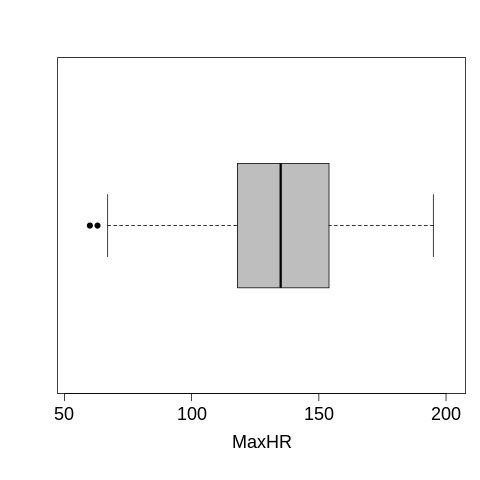

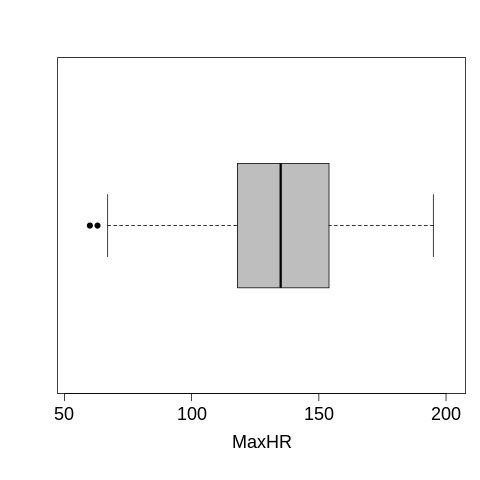

In [25]:
%%R
sbp::describe( MaxHR,dataframe)

$txt
[1] "The categorical variable ChestPainType has 818 observations:  454 ASY (55.5%), 153 ATA (18.7%), 172 NAP (21.03%), 39 TA (4.77%).  "                                                                                                                                      
[2] "Based on this data, it is estimated that 55.5% (95% CI: 52.02%, 58.94%), 18.7% (95% CI: 16.09%, 21.55%), 21.03% (95% CI: 18.28%, 23.98%) and 4.77% (95% CI: 3.41%, 6.46%) of subjects in the population are ChestPainType categories ASY, ATA, NAP and TA, respectively."

$tbl
  ChestPainType   n   percent     95% LB     95% UB
1           ASY 454 55.501222 0.52019802 0.58942866
2           ATA 153 18.704156 0.16087450 0.21548559
3           NAP 172 21.026895 0.18281731 0.23982595
4            TA  39  4.767726 0.03411957 0.06460287

$method
[1] "The binomial distribution was used to estimate confidence intervals for the proportions of ChestPainType ASY, ATA, NAP and TA in the population.  "

$ref
NULL



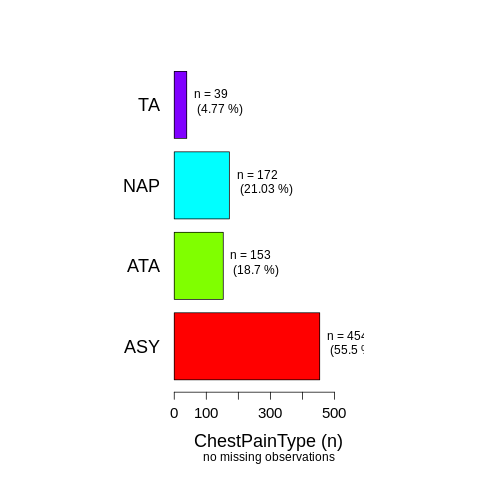

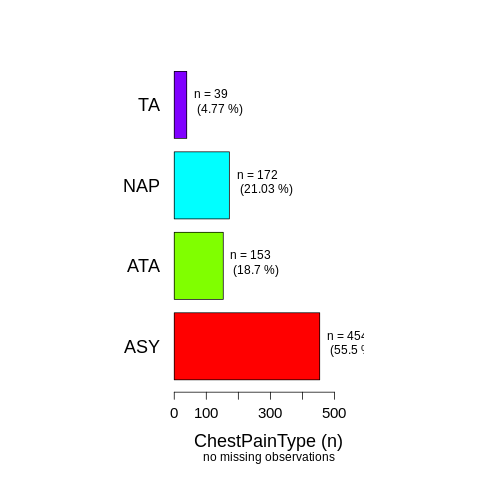

In [26]:
%%R
sbp::describe(ChestPainType,dataframe)

# Predictive Analysis

Predictive analysis involves using historical data to make informed forecasts or predictions about future trends and outcomes. It encompasses various statistical and machine learning techniques aimed at understanding relationships between variables and leveraging these relationships to predict unknown or future values. Linear regression is a fundamental example of predictive analysis, particularly useful when exploring relationships between two continuous variables. It models the relationship between an independent variable (predictor) and a dependent variable (outcome) using a linear equation, allowing analysts to quantify the impact of changes in the predictor on the outcome. By fitting a line to the data points, linear regression provides insights into trends and patterns, helps in making predictions based on new data, and forms the basis for more complex predictive modeling techniques. Predictive analysis, including linear regression, finds applications across industries such as finance, marketing, healthcare, and beyond, aiding in decision-making and strategic planning based on data-driven insights.


## Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable (often denoted as $Y$) and one or more independent variables (denoted as $X$. It assumes a linear relationship between the variables, where changes in the independent variables are associated with proportional changes in the dependent variable. The model takes the form of a linear equation,

$Y = \beta_0 + \beta_1 X + \epsilon$

where $\beta_0$ and $\beta_1$ are coefficients representing the intercept and slope of the line, respectively, and $\epsilon$ is the error term accounting for the variability in $Y$ that cannot be explained by the linear relationship with $X$.

$tbl
NULL

$txt
[1] "The correlation of RestingBP and Cholesterol is  statistically significant (Spearman r = 0.102; p = 0.00966084179909832).  "

$method
[1] "To evaluate the association of RestingBP and Cholesterol, a simple linear regression model with RestingBP as the sole predictor of Cholesterol was fit to the data.  The distribution of residuals of this model did differ significantly from the normal distribution (Shapiro-Wilk p = 4.28467160804918e-17).  Therefore, Spearman's correlation was used to evaluate the association of RestingBP and Cholesterol.  "

$ref
NULL

attr(,"class")
[1] "SBP.result"


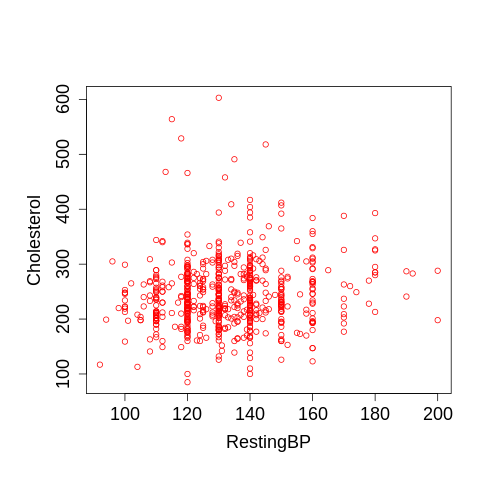

In [27]:
%%R
df <- dataframe%>%filter(Cholesterol>0)
sbp::associate(Cholesterol~RestingBP,df)

In [28]:
%%R
model <- lm(Cholesterol~RestingBP, df)
summary(model)


Call:
lm(formula = Cholesterol ~ RestingBP, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-154.94  -36.28   -8.50   31.15  359.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 194.5607    18.2593  10.655  < 2e-16 ***
RestingBP     0.3781     0.1362   2.776  0.00566 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 60.24 on 644 degrees of freedom
Multiple R-squared:  0.01183,	Adjusted R-squared:  0.01029 
F-statistic: 7.706 on 1 and 644 DF,  p-value: 0.005662



In [29]:
%%R
test <- read_csv("https://raw.githubusercontent.com/memphis-iis/datawhys-r-workshop-2024/main/heart%20-%20test.csv")
predict(model,test )


Rows: 100 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
       1        2        3        4        5        6        7        8 
247.5002 255.0630 252.0379 233.1309 234.2653 241.8281 243.7188 258.8444 
       9       10       11       12       13       14       15       16 
241.8281 240.6937 242.9625 243.7188 243.7188 245.6095 230.1058 239.9374 
      17       18       19       20       21       22       23       24 
239.9374 236.1560 245.6095 251.2816 243.7188 246.7439 245.6095 243.7188 
      25       26       27       28       29       30       31       32 
244.4751 251.2816 239.1811 249.3909 239.1811 238.0467 242.9625 243.7188 

## Classifier: Decision Tree

A decision tree classifier is a machine learning algorithm used for both classification and regression tasks. It works by recursively splitting the data into subsets based on the value of input features, creating a tree-like model of decisions. Each internal node of the tree represents a feature, each branch represents a decision rule, and each leaf node represents an outcome or class label. The goal is to create a model that predicts the target variable by learning simple decision rules inferred from the data features. Decision trees are popular due to their interpretability, simplicity, and ability to handle both numerical and categorical data.

In [30]:
%%R
install.packages("rpart")
install.packages("rpart.plot")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpD10W3t/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpD10W3t/downloaded_packages’



![](https://pbs.twimg.com/media/GQdtj7MW8AAIhct?format=png&name=small)

In [31]:
%%R
library(rpart)
library(rpart.plot)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=":DnqNggtgG;%RUkFbAI2">rpart</variable><variable id="#3)]6Mn1RDl:OTJ;6@17">rpart.plot</variable></variables><block type="import_R" id="/}y[O0{eg@!NjVe8z4]6" x="77" y="32"><field name="libraryName" id=":DnqNggtgG;%RUkFbAI2">rpart</field><next><block type="import_R" id="4FcXhvE0}:A[i0QEVsaP"><field name="libraryName" id="#3)]6Mn1RDl:OTJ;6@17">rpart.plot</field></block></next></block></xml>

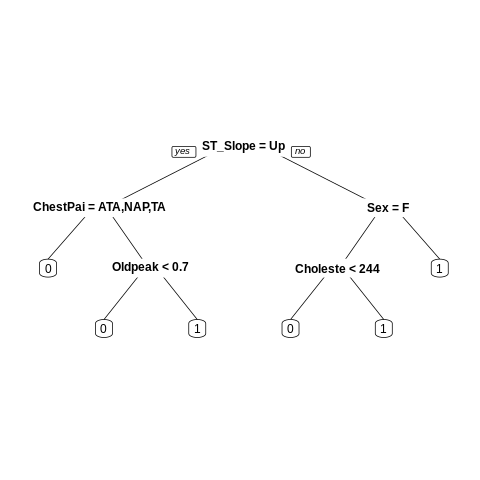

In [33]:
%%R
df$HeartDisease <- as.factor(df$HeartDisease)
tree <- rpart(HeartDisease ~ . , df)
prp(tree)

In [36]:
%%R
preds<-predict(tree,test, type = "class")
preds

  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   0   1   1   1   1   1   0   1   0   0   0   0   1   0   1   1   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   0   1   1   1   0   0   1   0   0   1   0   0   1   0   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   0   1   0   0   1   1   1   0   0   0   0   0   1   1   0   1   0   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   1   0   0   1   1   1   0   0   1   1   0   1   1   0   0   0   1   0   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   1   0   1   0   1   1   0   1   1   0   0   1   0   1   1   1   0   0 
Levels: 0 1


In [42]:
%%R
sum(preds==test$HeartDisease)/length(preds)*100

[1] 100


# Explore More

- Feel free to explore more the dataset. Perform addtional descriptive or statistical analysis.

# Next steps

If you enjoyed this workshop, the two options for next steps are:

- Our [full course](https://github.com/memphis-iis/datawhys-content-notebooks-r) on data science using R